In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [34]:
# Step 1: Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [35]:
# Step 2: Preprocess the data
# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0
# Reshape data to add channel dimension (for CNN)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
# Step 3: Build the model
# Option 1: Simple Neural Network (Multi-Layer Perceptron)
model_mlp = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

C:\Users\Anup\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
# Option 2: Convolutional Neural Network (CNN)
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [37]:
# Step 4: Compile the model
model = model_cnn  # Choose between model_mlp or model_cnn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.8959 - loss: 0.3286 - val_accuracy: 0.9840 - val_loss: 0.0465
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9841 - loss: 0.0506 - val_accuracy: 0.9854 - val_loss: 0.0430
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.9890 - loss: 0.0359 - val_accuracy: 0.9877 - val_loss: 0.0386
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 0.9913 - val_loss: 0.0243
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9908 - val_loss: 0.0288


In [39]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 2s - 6ms/step - accuracy: 0.9908 - loss: 0.0288

Test accuracy: 0.9908


In [40]:
# Step 7: Make predictions
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [42]:
# Step 8: Save the model
model.save('digit_recognition_model.h5')

# Load the model (for later use)
loaded_model = tf.keras.models.load_model('digit_recognition_model.h5')

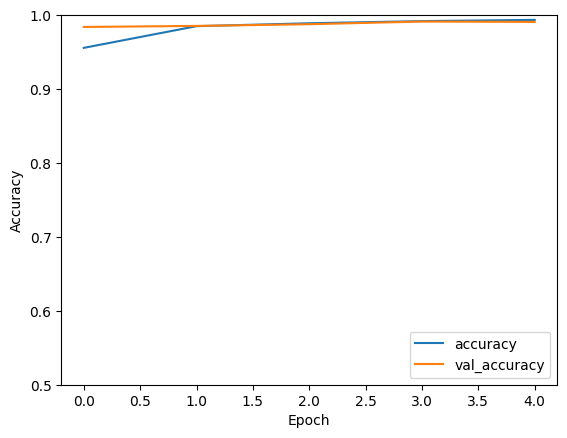

In [43]:
# Optional: Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

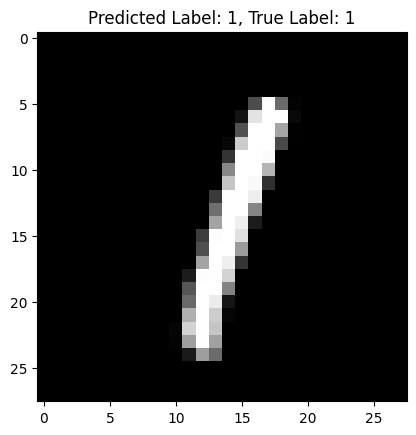

In [44]:
# Testing a single prediction
index = 5
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[index])}, True Label: {y_test[index]}")
plt.show()

In [50]:
# import cv2
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt

# # Step 1: Load the Pre-trained Model
model = tf.keras.models.load_model('digit_recognition_model.h5')

# Step 2: Load and Preprocess the Image
# Replace 'phone_number_image.png' with the path to your uploaded image
image_path = 'number.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale

# Apply thresholding to get a binary image
_, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((2, 2), np.uint8)
img_dilated = cv2.dilate(img_binary, kernel, iterations=1)

# Step 3: Find Contours of the Digits
# Find contours which might correspond to the digits in the image
##contours, _ = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, _ = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours left to right
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])


In [51]:
# Step 4: Process Each Contour and Predict
phone_number = ""
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    
    # Extract the digit image using the bounding box
    digit = img_binary[y:y+h, x:x+w]
    
    # Resize to 28x28 pixels
    digit_resized = cv2.resize(digit, (28, 28))
    
    # Normalize and reshape the digit
    digit_normalized = digit_resized / 255.0
    digit_reshaped = digit_normalized.reshape(1, 28, 28, 1)
    
    # Predict the digit using the pre-trained model
    prediction = model.predict(digit_reshaped)
    predicted_digit = np.argmax(prediction)
    
    # Append the predicted digit to the phone number string
    phone_number += str(predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [52]:
# Step 5: Display the Result
print(f"Predicted Phone Number: {phone_number}")


Predicted Phone Number: 51841137431130


In [53]:
# Optional: Display the original image with bounding boxes
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

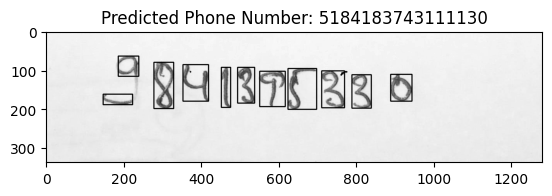

In [49]:
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Phone Number: {phone_number}')
plt.show()